   Unnamed: 0  Time(min)  Chamber:Pressure(Pa)  Dewar: Pressure(Pa)  \
0      1148.0        0.0                  9.60              12.0000   
1      1150.0        2.0                  0.46               0.0260   
2      1151.0        3.0                  0.23               0.0130   
3      1152.0        4.0                  0.16               0.0076   
4      1153.0        5.0                  0.13               0.0065   

   Unnamed: 4  Time /min  Plate Ch4/K  Plate Ch4/K.1  
0         NaN   0.000000        83.52          83.52  
1         NaN   0.166667        83.52          83.52  
2         NaN   0.333333        83.55          83.55  
3         NaN   0.500000        83.52          83.52  
4         NaN   0.666667        83.52          83.52  


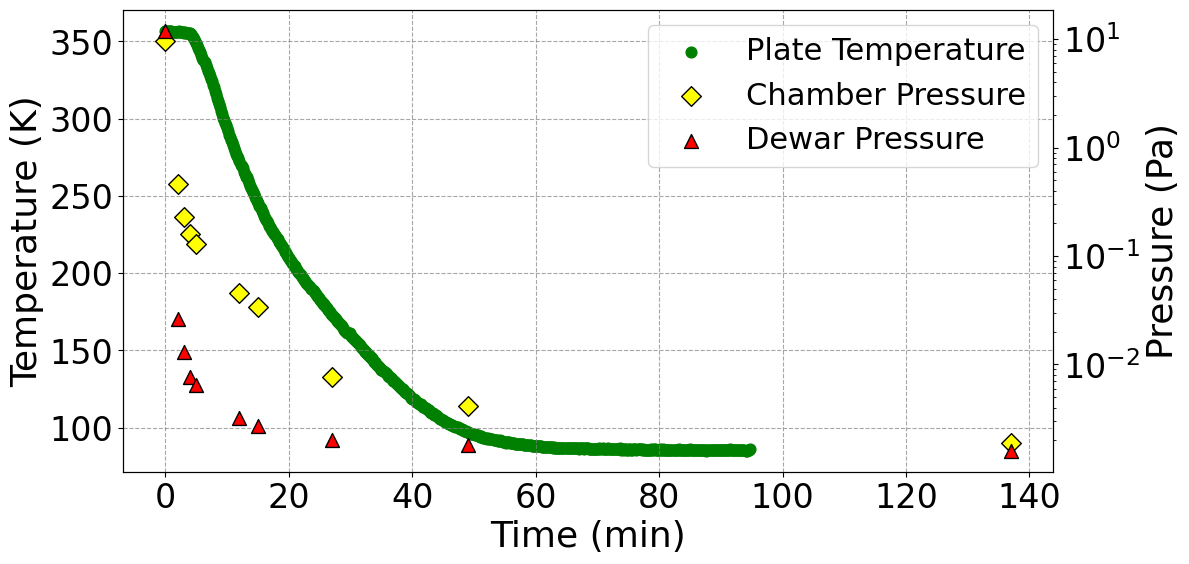

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Excelファイルを読み込む
df = pd.read_excel('temp-pres.xlsx')

# データの確認
print(df.head())

# 温度データをケルビンに変換（摂氏に273を足す）
df['Plate Ch4/K'] = df['Plate Ch4/K'] + 273

# グラフの作成
fig, ax1 = plt.subplots(figsize=(12, 6))

# 温度のプロット（左軸）
ax1.set_xlabel('Time (min)', fontsize=26)  # 軸ラベルのフォントサイズを大きく
ax1.set_ylabel('Temperature (K)', color='black', fontsize=26)  # 軸ラベルのフォントサイズを大きく
ax1.scatter(df['Time /min'], df['Plate Ch4/K'], color='green', label='Plate Temperature', s=60)
ax1.tick_params(axis='y', labelcolor='black', labelsize=24)  # 左軸の目盛りのフォントサイズを大きく
ax1.tick_params(axis='x', labelsize=24)  # x軸の目盛りのフォントサイズを大きく

# 圧力のプロット（右軸、対数スケール）
ax2 = ax1.twinx()
ax2.set_ylabel('Pressure (Pa)', color='black', fontsize=26)  # 軸ラベルのフォントサイズを大きく
ax2.scatter(df['Time(min)'], df['Chamber:Pressure(Pa)'], color='yellow', label='Chamber Pressure', 
            marker='D', s=100, edgecolors='black')
ax2.scatter(df['Time(min)'], df['Dewar: Pressure(Pa)'], color='red', label='Dewar Pressure', 
            marker='^', s=100, edgecolors='black')
ax2.set_yscale('log')  # 対数スケールに設定
ax2.tick_params(axis='y', labelcolor='black', labelsize=24)  # 右軸の目盛りのフォントサイズを大きく

# タイトルと凡例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=22)  # 凡例のフォントサイズも大きく

# グリッドの追加
ax1.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)

# グラフの保存
plt.savefig('temp_pres_graph.png', bbox_inches='tight', dpi=300)

# グラフの表示
plt.show()
